In [43]:
import pandas as pd
import numpy as np
from sklearn.metrics import cohen_kappa_score

from statsmodels.stats.inter_rater import fleiss_kappa
from sklearn.metrics import confusion_matrix
from matplotlib.colors import LogNorm

In [2]:
df = pd.read_csv('../comments/annotated.csv')

### Calculate cohens kappa

In [3]:
counts = df.groupby('commentId').agg(counts=('annotator', 'count')).reset_index()
df = df[df.commentId.isin(counts[counts.counts == 3].commentId)]

In [4]:
df = df.sort_values('commentId')

In [5]:
sentiment_map = {'Positive': 1, 'Neutral': 2, 'Negative': 3, 'Not applicable': 4}

In [6]:
ratings = np.zeros((int(df.shape[0] / 3), 3)) - 1
for annotator in [2, 3, 4]:
    mask = df.annotator == annotator
    ratings[:, annotator-2] = df[mask].sentiment.map(sentiment_map)

In [7]:
for i in range(3):
    for j in range(i, 3):
        if i != j:
            rater1 = ratings[:, i]
            rater2 = ratings[:, j]
            kappa = cohen_kappa_score(rater1, rater2)

            print(i, j, ':\t', kappa)

0 1 :	 0.7249698431845597
0 2 :	 0.7580645161290323
1 2 :	 0.7808619430241052


### Inspect cases of disagreement

In [8]:
mask = (ratings[:, 0] != ratings[:, 1]) & (ratings[:, 1] == ratings[:, 2]) & (ratings[:, 0] != ratings[:, 2])
df[['videoId', 'commentId', 'textOriginal', 'likeCount']].drop_duplicates()[mask].textOriginal

474    I remember after the 2nd Zombies was released,...
381    People who love Henry Cavill as Superman need ...
505    About time Lana Condor shows up in more movies...
257    "This is worse than that time Stewie suddenly ...
195                         Yeah, definitely not a cult.
396                                    Let's go Brandon!
59     "Is this the Regular Show?"\n"No, but some voi...
29                                #RestoreTheSnyderVerse
373    JG Quintel has reached his full power, no more...
357    Now wait for the parents to be like "ITS THE S...
Name: textOriginal, dtype: object

In [9]:
df[df.textOriginal.str.contains('who love Henry Cavill as Sup')]

,Unnamed: 0,videoId,commentId,textOriginal,likeCount,publishedAt,id,sentiment,annotator,annotation_id,created_at,updated_at,lead_time
381,25009,vM-Bja2Gy04,UgxBn1Xuhohwm6BrmTJ4AaABAg,People who love Henry Cavill as Superman need ...,3312,2021-02-27T03:10:37Z,61904,Neutral,2,1389,2022-12-12T15:47:39.322931Z,2022-12-12T15:47:39.322931Z,5.953
380,25009,vM-Bja2Gy04,UgxBn1Xuhohwm6BrmTJ4AaABAg,People who love Henry Cavill as Superman need ...,3312,2021-02-27T03:10:37Z,61904,Positive,3,1390,2022-12-12T15:47:40.368833Z,2022-12-12T15:47:40.368833Z,7.665
382,25009,vM-Bja2Gy04,UgxBn1Xuhohwm6BrmTJ4AaABAg,People who love Henry Cavill as Superman need ...,3312,2021-02-27T03:10:37Z,61904,Positive,4,1388,2022-12-12T15:47:36.754748Z,2022-12-12T15:47:36.754748Z,5.074


In [10]:
ratings.T

array([[4., 1., 4., 1., 2., 1., 3., 2., 1., 2., 1., 2., 2., 2., 1., 1.,
        3., 1., 1., 1., 1., 4., 1., 1., 1., 2., 3., 2., 1., 1., 2., 2.,
        1., 1., 3., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1., 2., 1., 1.,
        2., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 2., 2.,
        2., 1., 2., 1., 3., 2., 1., 2., 1., 3., 1., 1., 1., 1., 3., 1.,
        1., 1., 1., 1., 1., 3., 1., 1., 1., 2., 3., 3., 1., 1., 2., 1.,
        1., 2., 1., 1., 3., 4., 2., 2., 1., 2., 4., 2., 1., 1., 2., 1.,
        2., 1., 3., 1., 1., 1., 1., 3.],
       [4., 1., 4., 1., 1., 1., 2., 2., 1., 2., 1., 2., 2., 2., 1., 1.,
        3., 1., 1., 1., 1., 4., 1., 1., 1., 2., 3., 2., 1., 1., 2., 2.,
        1., 1., 3., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 1., 2.,
        2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 2.,
        2., 1., 2., 1., 3., 2., 1., 2., 2., 3., 2., 1., 2., 1., 2., 1.,
        1., 1., 1., 1., 1., 3., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1.,
        1., 2., 1., 1.,

### Confusion matrix

In [11]:
import matplotlib.pyplot as plt

In [12]:
# plt.style.use('fivethirtyeight')

In [13]:
# import mplcyberpunk
# plt.style.use("cyberpunk")
# plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')

In [14]:
plt.style.use("ggplot")

In [15]:
df['asdf'] = df.sentiment.map(sentiment_map)

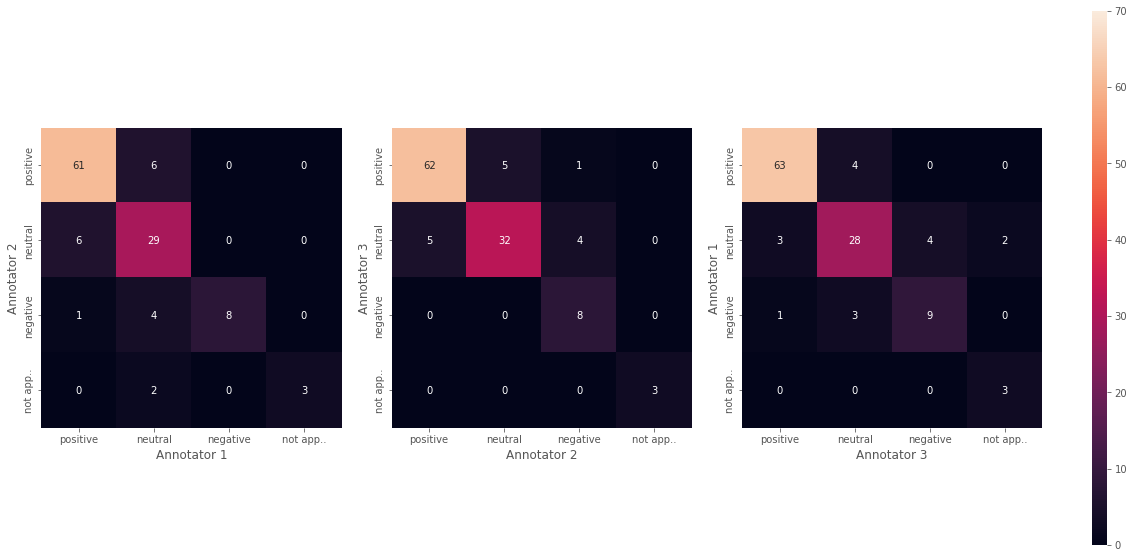

In [16]:
import seaborn as sns
fig, ax = plt.subplots(1, 4, figsize=(16,8), gridspec_kw={'width_ratios': [4, 4, 4, .2]})

for i in range(3):
    j = (i+1) % 3
    if i == 2:
        sns.heatmap(confusion_matrix(ratings[:,i], ratings[:,j]), ax=ax[i], annot=True, square=True, cbar_ax=ax[3], vmin=0, vmax=70)
    else:
        sns.heatmap(confusion_matrix(ratings[:,i], ratings[:,j]), ax=ax[i], annot=True, square=True, cbar=False, vmin=0, vmax=70)
    ax[i].set_xlabel(f'Annotator {i+1}')
    ax[i].set_ylabel(f'Annotator {j+1}')
    ax[i].set_xticklabels(['positive', 'neutral', 'negative', 'not app..'])
    ax[i].set_yticklabels(['positive', 'neutral', 'negative', 'not app..'], va='center')
    
fig.tight_layout(pad=1.6)

In [23]:
mystyle

RcParams({'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#E5E5E5',
          'axes.grid': True,
          'axes.labelcolor': '#555555',
          'axes.labelsize': 'large',
          'axes.linewidth': 1.0,
          'axes.prop_cycle': cycler('color', ['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8']),
          'axes.titlesize': 'x-large',
          'figure.edgecolor': '0.50',
          'figure.facecolor': 'white',
          'font.size': 10.0,
          'grid.color': 'white',
          'grid.linestyle': '-',
          'patch.antialiased': True,
          'patch.edgecolor': '#EEEEEE',
          'patch.facecolor': '#348ABD',
          'patch.linewidth': 0.5,
          'xtick.color': '#555555',
          'xtick.direction': 'out',
          'ytick.color': '#555555',
          'ytick.direction': 'out'})

In [31]:
mystyle = plt.style.library['ggplot']
mystyle['font.size'] = 14
plt.style.use(mystyle)

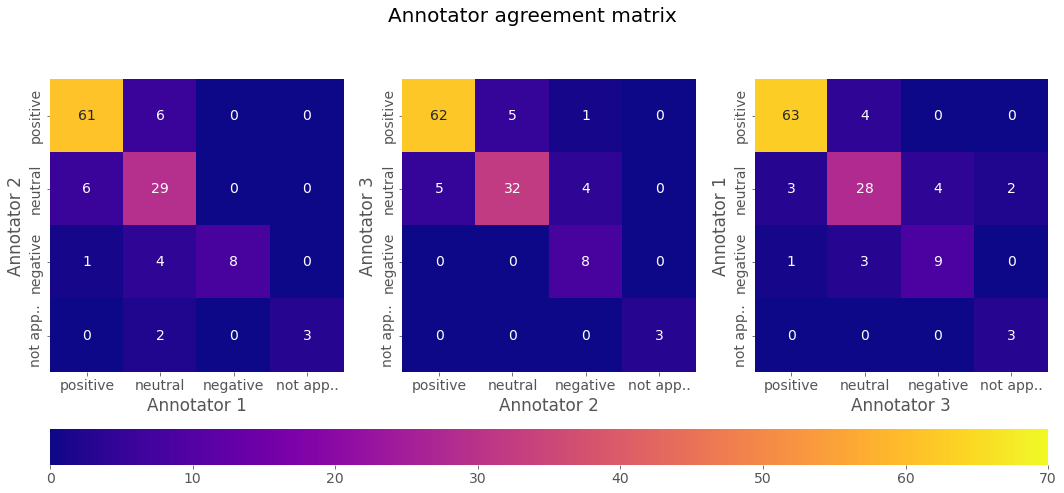

In [53]:
import seaborn as sns
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(15,7))
gs = GridSpec(2, 3, figure=fig, height_ratios=[10,1])

top_ax = fig.add_subplot(gs[1, :])

ax = [fig.add_subplot(gs[0, i]) for i in range(3)]
cmap = 'plasma'
for i in range(3):
    j = (i+1) % 3
    if i == 2:
        sns.heatmap(confusion_matrix(ratings[:,i], ratings[:,j]), ax=ax[i], annot=True, square=True, cbar_ax=top_ax, vmin=0, vmax=70, cbar_kws={'orientation': 'horizontal'}, cmap=cmap)
    else:
        sns.heatmap(confusion_matrix(ratings[:,i], ratings[:,j]), ax=ax[i], annot=True, square=True, cbar=False, vmin=0, vmax=70, cmap=cmap)
    ax[i].set_xlabel(f'Annotator {i+1}')
    ax[i].set_ylabel(f'Annotator {j+1}')
    ax[i].set_xticklabels(['positive', 'neutral', 'negative', 'not app..'])
    ax[i].set_yticklabels(['positive', 'neutral', 'negative', 'not app..'], va='center')
    
fig.suptitle('Annotator agreement matrix', fontsize=20)
# top_ax.set_xlabel('count')
fig.tight_layout()

In [36]:
fig.savefig('aamatrix.svg')